In [ ]:
!pip install scikit-fuzzy

## Library

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
%matplotlib inline

## Variabel

In [ ]:
# input
ide = np.arange(0, 100, 1)
sesuai = np.arange(0, 100, 1)
implementasi = np.arange(0,100 , 1)
#output
overall = np.arange(0, 100, 1)


## Fungsi Keanggotaan

In [ ]:
# Fungsi Keanggotaan ide
ide_lo = fuzz.trapmf(ide, [0,0,30,35])
ide_md = fuzz.trapmf(ide, [30,35,70,75])
ide_hi = fuzz.trapmf(ide, [70,75,100,100])
# Fungsi Keanggotaan kesesuaian
sesuai_lo = fuzz.trapmf(sesuai, [0,0,30,35])
sesuai_md = fuzz.trapmf(sesuai, [30,35,70,75])
sesuai_hi = fuzz.trapmf(sesuai, [70,75,100,100])
# Fungsi Keanggotaan implementasi
implementasi_lo = fuzz.trapmf(implementasi, [0,0,30,35])
implementasi_md = fuzz.trapmf(implementasi, [30,35,70,75])
implementasi_hi = fuzz.trapmf(implementasi, [70,75,100,100])
# Fungsi Keanggotaan overall
overall_lo = fuzz.trapmf(overall, [0,0,30,35])
overall_md = fuzz.trapmf(overall, [30,35,70,75])
overall_hi = fuzz.trapmf(overall, [70,75,100,100])

## Visualisasi Keanggotaan

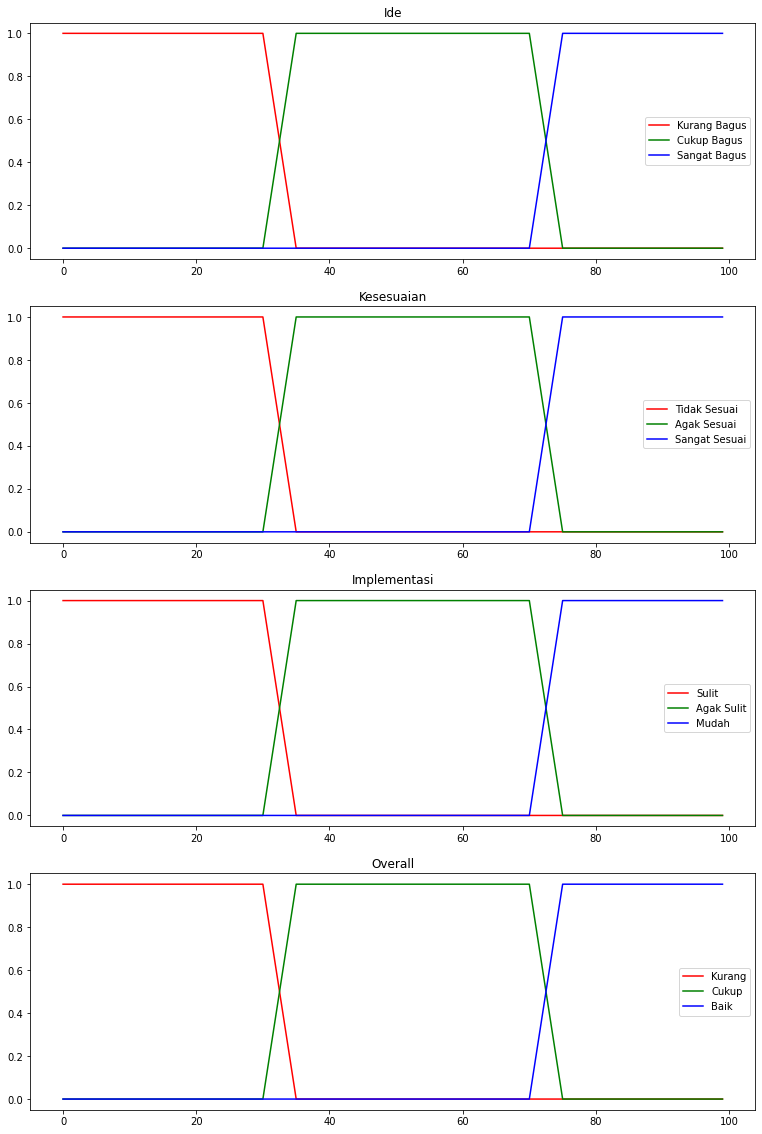

In [ ]:
# Visualize Membership
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(13,20))

ax0.plot(ide, ide_lo, 'r', linewidth=1.5, label='Kurang Bagus')
ax0.plot(ide, ide_md, 'g', linewidth=1.5, label='Cukup Bagus')
ax0.plot(ide, ide_hi, 'b', linewidth=1.5, label='Sangat Bagus')
ax0.set_title('Ide')
ax0.legend()

ax1.plot(sesuai, sesuai_lo, 'r', linewidth=1.5, label='Tidak Sesuai')
ax1.plot(sesuai, sesuai_md, 'g', linewidth=1.5, label='Agak Sesuai')
ax1.plot(sesuai, sesuai_hi, 'b', linewidth=1.5, label='Sangat Sesuai')
ax1.set_title('Kesesuaian')
ax1.legend()

ax2.plot(implementasi, implementasi_lo, 'r', linewidth=1.5, label='Sulit')
ax2.plot(implementasi, implementasi_md, 'g', linewidth=1.5, label='Agak Sulit')
ax2.plot(implementasi, implementasi_hi, 'b', linewidth=1.5, label='Mudah')
ax2.set_title('Implementasi')
ax2.legend()

ax3.plot(overall, overall_lo, 'r', linewidth=1.5, label='Kurang')
ax3.plot(overall, overall_md, 'g', linewidth=1.5, label='Cukup')
ax3.plot(overall, overall_hi, 'b', linewidth=1.5, label='Baik')
ax3.set_title("Overall")
ax3.legend()

In [ ]:
# Masukkan Nilai
print("Masukkan nilai anda (skala 1-100): ")
nilai_ide = input("Ide: ")
nilai_kesesuaian = input("Kesesuaian:")
nilai_implementasi = input("Kesulitan Dalam Implementasi: ")


Masukkan nilai anda (skala 1-100): 
Ide: 80
Kesesuaian:40
Kesulitan Dalam Implementasi: 10


## Penetapan Aturan

Text(0.5, 1.0, 'Output membership activity')

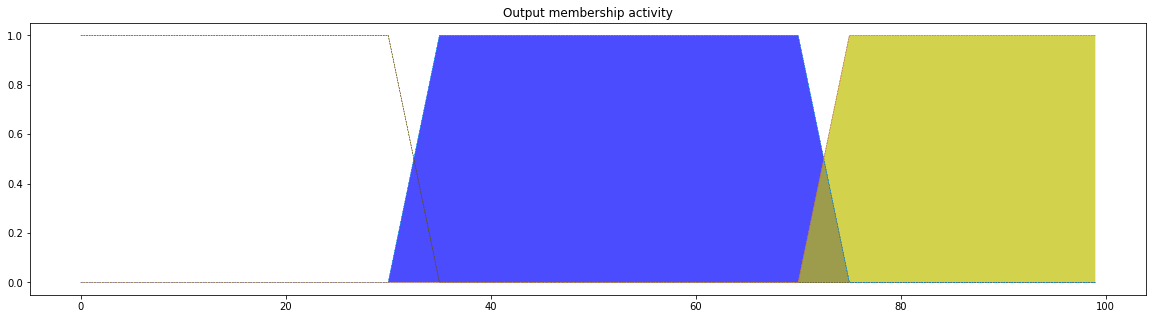

In [ ]:
ide_lvl_lo = fuzz.interp_membership(ide, ide_lo, nilai_ide)
ide_lvl_md = fuzz.interp_membership(ide, ide_md, nilai_ide)
ide_lvl_hi = fuzz.interp_membership(ide, ide_hi, nilai_ide)

sesuai_lvl_lo = fuzz.interp_membership(sesuai, sesuai_lo, nilai_kesesuaian)
sesuai_lvl_md = fuzz.interp_membership(sesuai, sesuai_md, nilai_kesesuaian)
sesuai_lvl_hi = fuzz.interp_membership(sesuai, sesuai_hi, nilai_kesesuaian)

implementasi_lvl_lo = fuzz.interp_membership(implementasi, implementasi_lo, nilai_implementasi)
implementasi_lvl_md = fuzz.interp_membership(implementasi, implementasi_md, nilai_implementasi)
implementasi_lvl_hi = fuzz.interp_membership(implementasi, implementasi_hi, nilai_implementasi)

# Rules
# If kurang bagus and tidak sesuai and susah then kurang
rule1 = np.fmin(ide_lvl_lo, np.fmin(sesuai_lvl_lo, implementasi_lvl_lo))
activate1 = np.fmin(rule1, overall_lo)

# If kurang bagus or tidak sesuai then kurang
rule2 = np.fmax(ide_lvl_lo, sesuai_lvl_lo)
activate2 = np.fmin(rule2, overall_lo)

# If cukup bagus or agak sesuai or agak sulit then cukup
rule3 = np.fmax(ide_lvl_md, np.fmax(sesuai_lvl_md, implementasi_lvl_md))
activate3 = np.fmin(rule3, overall_md)

# If sangat bagus and sangat sesuai and sulit then cukup
rule4 = np.fmin(ide_lvl_hi, np.fmin(sesuai_lvl_hi, implementasi_lvl_hi))
activate4 = np.fmin(rule4, overall_md)

# If sangat bagus and sangat sesuai then baik
rule5 = np.fmin(ide_lvl_hi, sesuai_lvl_hi)
activate5 = np.fmin(rule5, overall_hi)

# If sangat bagus and sangat sesuai and mudah then baik
rule6 = np.fmax(ide_lvl_hi, np.fmax(sesuai_lvl_hi, implementasi_lvl_hi))
activate6 = np.fmin(rule6, overall_hi)
overall0 = np.zeros_like(overall)

fig, ax0 = plt.subplots(figsize=(20, 5))

ax0.fill_between(overall, overall0, activate1, facecolor='r', alpha=0.7)
ax0.plot(overall, overall_lo, 'r', linewidth=0.5, linestyle='--', )
ax0.fill_between(overall, overall0, activate2, facecolor='g', alpha=0.7)
ax0.plot(overall, overall_lo, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(overall, overall0, activate3, facecolor='b', alpha=0.7)
ax0.plot(overall, overall_md, 'b', linewidth=0.5, linestyle='--')
ax0.fill_between(overall, overall0, activate4, facecolor='c', alpha=0.7)
ax0.plot(overall, overall_md, 'c', linewidth=0.5, linestyle='--', )
ax0.fill_between(overall, overall0, activate5, facecolor='m', alpha=0.7)
ax0.plot(overall, overall_hi, 'm', linewidth=0.5, linestyle='--')
ax0.fill_between(overall, overall0, activate6, facecolor='y', alpha=0.7)
ax0.plot(overall, overall_hi, 'y', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

## Defuzzification

Nilai akhir:
65.61000510464523


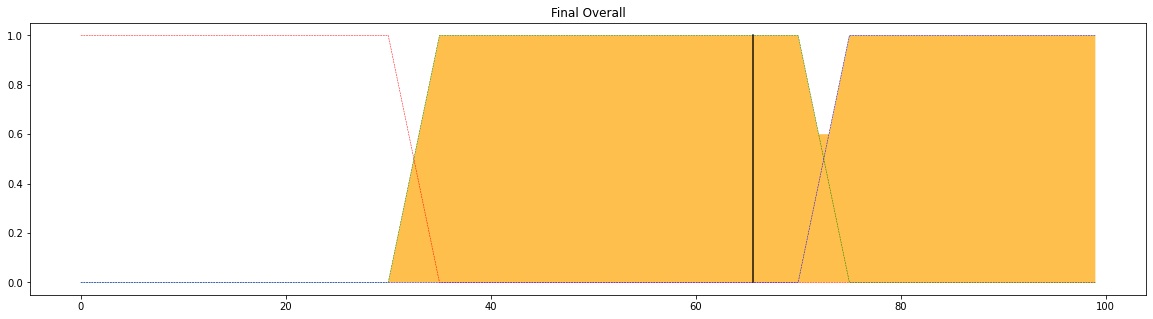

In [ ]:
aggregated = np.fmax(activate1,np.fmax(activate2, np.fmax(activate3,np.fmax(activate4, np.fmax(activate5, activate6)))))

# Calculate defuzzification
overall_final = fuzz.defuzz(overall, aggregated, "centroid")
activate_ovr_final = fuzz.interp_membership(overall, aggregated, overall_final)

# Visualize final
fig, ax0 = plt.subplots(figsize=(20, 5))
ax0.plot(overall, overall_lo, 'r', linewidth=0.5, linestyle='--')
ax0.plot(overall, overall_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(overall, overall_hi, 'b', linewidth=0.5, linestyle='--')
ax0.fill_between(overall, overall0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([overall_final, overall_final], [0, activate_ovr_final], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Final Overall')

print("Nilai akhir:")
print(overall_final)